# Scraping Data

In [22]:
# Each API has a unique method for data extraction. 
# It's important to review the API's documentation to understand how to interact with it effectively 
#                                                    and adapt your approach based on the specifics. 
# I used an example with CoinAPI to illustrate this scraping process.

import requests

class Scraper:
    def url(self, URL):
        # Got header in CoinAPI document
        headers = {"X-CoinAPI-Key": "<enter api key>"}  
        response = requests.get(URL, headers=headers)
        return response.json() # It retruns in json default and can't be changed
    
# Call in main
scraper = Scraper()
# Modify each url to get data of different aspects e.g. time range
btc = scraper.url("https://rest.coinapi.io/v1/ohlcv/BINANCE_SPOT_BTC_USDT/history?period_id=1DAY&time_start=2023-01-01T00:00:00")
eth = scraper.url("https://rest.coinapi.io/v1/ohlcv/BINANCE_SPOT_ETH_USDT/history?period_id=1DAY&time_start=2023-01-01T00:00:00")
xrp = scraper.url("https://rest.coinapi.io/v1/ohlcv/BINANCE_SPOT_XRP_USDT/history?period_id=1DAY&time_start=2023-01-01T00:00:00")

# Print the raw data
print("\nBitcoin data:\n\n", btc)
print("\nEthereum data data:\n\n", eth)
print("\nRipple data:\n\n", xrp)


Bitcoin data:

 [{'time_period_start': '2023-01-01T00:00:00.0000000Z', 'time_period_end': '2023-01-02T00:00:00.0000000Z', 'time_open': '2023-01-01T00:00:00.0320000Z', 'time_close': '2023-01-02T00:00:00.1690000Z', 'price_open': 16542.4, 'price_high': 16628, 'price_low': 16499.01, 'price_close': 16617.09, 'volume_traded': 96375.24211, 'trades_count': 3201380}, {'time_period_start': '2023-01-02T00:00:00.0000000Z', 'time_period_end': '2023-01-03T00:00:00.0000000Z', 'time_open': '2023-01-02T00:00:00.4950000Z', 'time_close': '2023-01-02T23:59:59.9980000Z', 'price_open': 16617.28, 'price_high': 16799.23, 'price_low': 16548.7, 'price_close': 16672.87, 'volume_traded': 121460.43538, 'trades_count': 4019072}, {'time_period_start': '2023-01-03T00:00:00.0000000Z', 'time_period_end': '2023-01-04T00:00:00.0000000Z', 'time_open': '2023-01-03T00:00:00.0000000Z', 'time_close': '2023-01-04T00:00:00.1380000Z', 'price_open': 16672.78, 'price_high': 16778.4, 'price_low': 16605.28, 'price_close': 16675.17,

# Data Cleaning and Structuring

In [23]:
import pandas as pd

btc = pd.DataFrame(btc)
eth = pd.DataFrame(eth) 
xrp = pd.DataFrame(xrp)

class CryptoData:
    def __init__(self, data):
        self.data = data

    def cleanData(self):
        self.data.dropna(inplace=True) # Drop rows which contain null values
        self.data.drop_duplicates(inplace=True) # Drop dublicate rows

    def structureData(self):
        self.cleanData() # Clean data
        # We make a colomn name 'Time' that contain values of 'time_period_start' and 'Price' contain 'price_open'
        data = pd.DataFrame({'Time': self.data['time_period_start'], 'Price': self.data['price_open']})
        return data
    
# Call in main
dataBTC = CryptoData(btc)
dataETH = CryptoData(eth)
dataXRP = CryptoData(xrp)

# Structure data
structureBTC = dataBTC.structureData()
structureETH = dataETH.structureData()
structureXRP = dataXRP.structureData()

print("Bitcoin:\n",structureBTC.head())
print("\nEthereum:\n", structureETH.head())
print("\nRipple:\n", structureXRP.head())

Bitcoin:
                            Time     Price
0  2023-01-01T00:00:00.0000000Z  16542.40
1  2023-01-02T00:00:00.0000000Z  16617.28
2  2023-01-03T00:00:00.0000000Z  16672.78
3  2023-01-04T00:00:00.0000000Z  16675.00
4  2023-01-05T00:00:00.0000000Z  16850.36

Ethereum:
                            Time    Price
0  2023-01-01T00:00:00.0000000Z  1196.13
1  2023-01-02T00:00:00.0000000Z  1200.34
2  2023-01-03T00:00:00.0000000Z  1213.99
3  2023-01-04T00:00:00.0000000Z  1214.56
4  2023-01-05T00:00:00.0000000Z  1256.91

Ripple:
                            Time   Price
0  2023-01-01T00:00:00.0000000Z  0.3389
1  2023-01-02T00:00:00.0000000Z  0.3386
2  2023-01-03T00:00:00.0000000Z  0.3482
3  2023-01-04T00:00:00.0000000Z  0.3436
4  2023-01-05T00:00:00.0000000Z  0.3471


# Handling Missing Values

In [24]:
class CryptoData:
    def __init__(self, data):
        self.data = data

    def cleanData(self):
        self.data.dropna(inplace=True) # Drop rows which contain null values
        self.data.drop_duplicates(inplace=True) # Drop dublicate rows

    def structureData(self):
        self.cleanData() # Clean data
        self.handleMissingValues() # Deal with missing values
        # We make a colomn name 'Time' that contain values of 'time_period_start' and 'Price' contain 'price_open'
        data = pd.DataFrame({'Time': self.data['time_period_start'], 'Price': self.data['price_open']})
        return data
    
    def handleMissingValues(self):
        # If 'price_open' values are missing, fill them with the mean of 'price_open'
        x = self.data['price_open'].mean()
        self.data['price_open'].fillna(x, inplace=True)

# Call in main
dataBTC = CryptoData(btc)
dataETH = CryptoData(eth)
dataXRP = CryptoData(xrp)

# Structure data
structureBTC = dataBTC.structureData()
structureETH = dataETH.structureData()
structureXRP = dataXRP.structureData()

print("Bitcoin:\n", structureBTC.head())
print("\nEthereum:\n", structureETH.head())
print("\nRipple:\n", structureXRP.head())

Bitcoin:
                            Time     Price
0  2023-01-01T00:00:00.0000000Z  16542.40
1  2023-01-02T00:00:00.0000000Z  16617.28
2  2023-01-03T00:00:00.0000000Z  16672.78
3  2023-01-04T00:00:00.0000000Z  16675.00
4  2023-01-05T00:00:00.0000000Z  16850.36

Ethereum:
                            Time    Price
0  2023-01-01T00:00:00.0000000Z  1196.13
1  2023-01-02T00:00:00.0000000Z  1200.34
2  2023-01-03T00:00:00.0000000Z  1213.99
3  2023-01-04T00:00:00.0000000Z  1214.56
4  2023-01-05T00:00:00.0000000Z  1256.91

Ripple:
                            Time   Price
0  2023-01-01T00:00:00.0000000Z  0.3389
1  2023-01-02T00:00:00.0000000Z  0.3386
2  2023-01-03T00:00:00.0000000Z  0.3482
3  2023-01-04T00:00:00.0000000Z  0.3436
4  2023-01-05T00:00:00.0000000Z  0.3471


# Data Transformation

In [25]:
import numpy as np

class CryptoData:
    def __init__(self, data):
        self.data = data

    def cleanData(self):
        self.data.dropna(inplace=True)  # Drop rows which contain null values
        self.data.drop_duplicates(inplace=True)  # Drop duplicate rows
        # Handling zero values in logarithmic returns
        zero = self.data.index[self.data['log'] == 0]
        if not zero.empty:  # Check if zero is not empty
            # Remove rows with zero values
            self.data.drop(zero, inplace=True)

    def handleMissingValues(self):
        # If 'price_open' values are missing, fill them with the mean of 'price_open'
        self.data['price_open'].fillna(self.data['price_open'].mean(), inplace=True)
        
    def structureData(self):
        self.cleanData()  # Clean data
        self.handleMissingValues()  # Deal with missing values
        # We make a column named 'Time' that contains values of 'time_period_start' and 'Price' contains 'price_open'
        data = pd.DataFrame({'Time': self.data['time_period_start'], 'Logarithmic Returns': self.data['log']})
        return data
    
    def logReturn(self):
        # Log returns
        self.data['log'] = np.log(self.data['price_open'] / self.data['price_close'].shift(1)) 

# Call in main
dataBTC = CryptoData(btc)
dataETH = CryptoData(eth)
dataXRP = CryptoData(xrp)

# Calculate logarithmic returns
dataBTC.logReturn()
dataETH.logReturn()
dataXRP.logReturn()

# Structure data
structureBTC = dataBTC.structureData()
structureETH = dataETH.structureData()
structureXRP = dataXRP.structureData()

print("Bitcoin:\n", structureBTC.head())
print("\nEthereum:\n", structureETH.head())
print("\nRipple:\n", structureXRP.head())


Bitcoin:
                            Time  Logarithmic Returns
1  2023-01-02T00:00:00.0000000Z             0.000011
2  2023-01-03T00:00:00.0000000Z            -0.000005
3  2023-01-04T00:00:00.0000000Z            -0.000010
5  2023-01-06T00:00:00.0000000Z             0.000023
6  2023-01-07T00:00:00.0000000Z             0.000022

Ethereum:
                            Time  Logarithmic Returns
2  2023-01-03T00:00:00.0000000Z            -0.000008
3  2023-01-04T00:00:00.0000000Z             0.000008
4  2023-01-05T00:00:00.0000000Z             0.000008
6  2023-01-07T00:00:00.0000000Z             0.000008
7  2023-01-08T00:00:00.0000000Z            -0.000008

Ripple:
                             Time  Logarithmic Returns
1   2023-01-02T00:00:00.0000000Z            -0.000295
4   2023-01-05T00:00:00.0000000Z            -0.000288
6   2023-01-07T00:00:00.0000000Z            -0.000290
9   2023-01-10T00:00:00.0000000Z            -0.000287
10  2023-01-11T00:00:00.0000000Z            -0.000285


# Analysis

In [26]:
class CryptoData:
    def __init__(self, data):
        self.data = data

    def cleanData(self):
        self.data.dropna(inplace=True)  # Drop rows which contain null values
        self.data.drop_duplicates(inplace=True)  # Drop duplicate rows
        # Handling zero values in logarithmic returns
        zero = self.data.index[self.data['log'] == 0]
        if not zero.empty:  # Check if zero is not empty
            # Remove rows with zero values
            self.data.drop(zero, inplace=True)
            
    def structureData(self):
        self.cleanData()  # Clean data
        self.handleMissingValues()  # Deal with missing values
        # We make a column named 'Time' that contains values of 'time_period_start' and 'Price' contains 'price_open'
        data = pd.DataFrame({'Time': self.data['time_period_start'], 'Logarithmic Returns': self.data['log']})
        return data

    def handleMissingValues(self):
        # If 'price_open' values are missing, fill them with the mean of 'price_open'
        self.data['price_open'].fillna(self.data['price_open'].mean(), inplace=True)

    def logReturn(self):
        # Log returns
        self.data['log'] = np.log(self.data['price_open'] / self.data['price_close'].shift(1)) 

    def analysis(self):
        mean = self.data['log'].mean()  # Calculate Mean
        median = self.data['log'].median()  # Calculate Median
        std = self.data['log'].std()  # Calculate Standard Deviation
        maximum = self.data.loc[self.data['log'].idxmax(), 'time_open']  # Calculate max time by Log Returns
        returnData = pd.DataFrame({'BTC': self.data['log'], 'ETH': self.data['log'], 'XRP': self.data['log']})
        matrix = pd.DataFrame(returnData).corr()  # Correlation Matrix
        return mean, median, std, maximum, matrix

# Call in main
dataBTC = CryptoData(btc)
dataETH = CryptoData(eth)
dataXRP = CryptoData(xrp)

# Call analysis
meanBTC, medianBTC, stdBTC, maxBTC, matrix = dataBTC.analysis()
meanETH, medianETH, stdETH, maxETH, matrix = dataETH.analysis()
meanXRP, medianXRP, stdXRP, maxXRP, matrix = dataXRP.analysis()

print("Bitcoin Analysis")
print("Mean Return:", meanBTC)
print("Median Return:", medianBTC)
print("Standard Deviation Return:", stdBTC)
print("Highest Return Date of Bitcoin:", maxBTC)

print("\nEthereum Analysis")
print("Mean Return:", meanETH)
print("Median Return:", medianETH)
print("Standard Deviation Return:", stdETH)
print("Highest Return Date of Ethereum:", maxETH)

print("\nRipple Analysis")
print("Mean Return:", meanXRP)
print("Median Return:", medianXRP)
print("Standard Deviation Return:", stdXRP)
print("Highest Return Date of Ripple:", maxXRP)

print("\nCorrelation matrix between the returns of Bitcoin, Ethereum, and Ripple:\n\n", matrix ,"\n")

Bitcoin Analysis
Mean Return: 7.612166191425469e-05
Median Return: -3.6083882997564964e-07
Standard Deviation Return: 0.0005681375548870981
Highest Return Date of Bitcoin: 2023-02-03T00:05:15.9990000Z

Ethereum Analysis
Mean Return: -1.3738065952322637e-05
Median Return: -5.897944068920128e-06
Standard Deviation Return: 0.0002620382126567579
Highest Return Date of Ethereum: 2023-02-10T00:05:17.3410000Z

Ripple Analysis
Mean Return: -8.648720554287882e-05
Median Return: -0.00019306882963724745
Standard Deviation Return: 0.00046356512585587074
Highest Return Date of Ripple: 2023-03-17T00:00:01.0860000Z

Correlation matrix between the returns of Bitcoin, Ethereum, and Ripple:

      BTC  ETH  XRP
BTC  1.0  1.0  1.0
ETH  1.0  1.0  1.0
XRP  1.0  1.0  1.0 



# Visualization

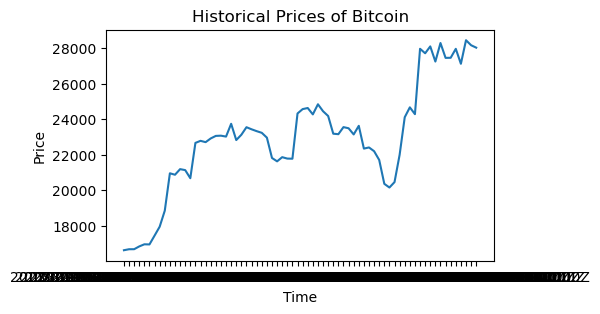

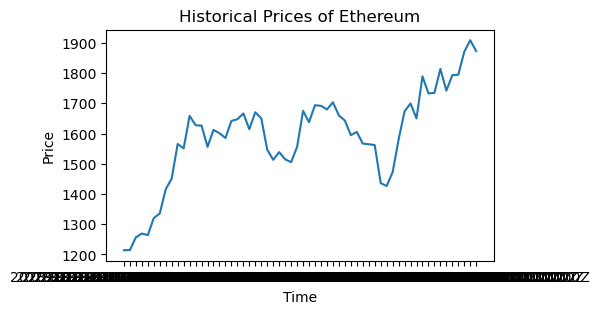

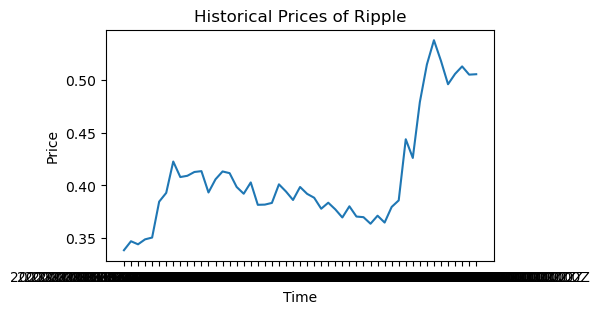

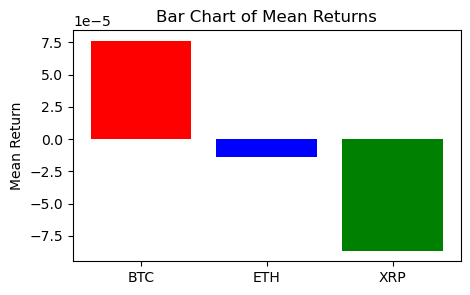

In [27]:
import matplotlib.pyplot as plt

class CryptoData:
    def __init__(self, data):
        self.data = data

    def cleanData(self):
        self.data.dropna(inplace=True)  # Drop rows which contain null values
        self.data.drop_duplicates(inplace=True)  # Drop duplicate rows
        # Handling zero values in logarithmic returns
        zero = self.data.index[self.data['log'] == 0]
        if not zero.empty:  # Check if zero is not empty
            # Remove rows with zero values
            self.data.drop(zero, inplace=True)

    def structureData(self):
        self.cleanData()  # Clean data
        self.handleMissingValues()  # Deal with missing values
        # We make a column named 'Time' that contains values of 'time_period_start' and 'Price' contains 'price_open'
        data = pd.DataFrame({'Time': self.data['time_period_start'], 'Logarithmic Returns': self.data['log']})
        return data

    def handleMissingValues(self):
        # If 'price_open' values are missing, fill them with the mean of 'price_open'
        self.data['price_open'].fillna(self.data['price_open'].mean(), inplace=True)

    def logReturn(self):
        # Log returns
        self.data['log'] = np.log(self.data['price_open'] / self.data['price_close'].shift(1)) 

    def analysis(self):
        mean = self.data['log'].mean()  # Calculate Mean
        median = self.data['log'].median()  # Calculate Median
        std = self.data['log'].std()  # Calculate Standard Deviation
        maximum = self.data.loc[self.data['log'].idxmax(), 'time_open']  # Calculate max time by Log Returns
        returnData = pd.DataFrame({'BTC': self.data['log'], 'ETH': self.data['log'], 'XRP': self.data['log']})
        matrix = pd.DataFrame(returnData).corr()  # Correlation Matrix
        return mean, median, std, maximum, matrix

    def visualization(self, name, n = 0):
        # Line chart
        plt.figure(figsize=(5, 3)) # Size
        plt.plot(self.data['time_period_start'], self.data['price_open']) # Line chart parameters
        plt.title(f"Historical Prices of {name}")
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.show()
        if n == 1:
            # Bar chart
            mean = [meanBTC, meanETH, meanXRP] # Data
            coin = ['BTC', 'ETH', 'XRP']
            plt.figure(figsize=(5, 3)) # Size
            plt.bar(coin, mean, color=['red', 'blue', 'green']) # Bar chart parameters
            plt.title('Bar Chart of Mean Returns')
            plt.ylabel('Mean Return')
            plt.show()
            
# Call in main
dataBTC = CryptoData(btc)
dataETH = CryptoData(eth)
dataXRP = CryptoData(xrp)

# Call visualization
dataBTC.visualization('Bitcoin')
dataETH.visualization('Ethereum')
dataXRP.visualization('Ripple', n = 1) # Hardcode to show bar chart

# Save Results

In [35]:
class CryptoData:
    def __init__(self, data):
        self.data = data

    def cleanData(self):
        self.data.dropna(inplace=True)  # Drop rows which contain null values
        self.data.drop_duplicates(inplace=True)  # Drop duplicate rows
        # Handling zero values in logarithmic returns
        zero = self.data.index[self.data['log'] == 0]
        if not zero.empty:  # Check if zero is not empty
            # Remove rows with zero values
            self.data.drop(zero, inplace=True)

    def structureData(self):
        self.cleanData()  # Clean data
        self.handleMissingValues()  # Deal with missing values
        # We make a column named 'Time' that contains values of 'time_period_start' and 'Price' contains 'price_open'
        data = pd.DataFrame({'Time': self.data['time_period_start'], 'Logarithmic Returns': self.data['log']})
        return data

    def handleMissingValues(self):
        # If 'price_open' values are missing, fill them with the mean of 'price_open'
        self.data['price_open'].fillna(self.data['price_open'].mean(), inplace=True)

    def logReturn(self):
        # Log returns
        self.data['log'] = np.log(self.data['price_open'] / self.data['price_close'].shift(1)) 

    def analysis(self):
        mean = self.data['log'].mean()  # Calculate Mean
        median = self.data['log'].median()  # Calculate Median
        std = self.data['log'].std()  # Calculate Standard Deviation
        maximum = self.data.loc[self.data['log'].idxmax(), 'time_open']  # Calculate max time by Log Returns
        returnData = pd.DataFrame({'BTC': self.data['log'], 'ETH': self.data['log'], 'XRP': self.data['log']})
        matrix = pd.DataFrame(returnData).corr()  # Correlation Matrix
        return mean, median, std, maximum, matrix

    def visualization(self, name, n = None):
        # Line chart
        plt.figure(figsize=(5, 3)) # Size
        plt.plot(self.data['time_period_start'], self.data['price_open']) # Line chart parameters
        plt.title(f"Historical Prices of {name}")
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.show()
        if n == 1:
            # Bar chart
            mean = [meanBTC, meanETH, meanXRP] # Data
            coin = ['BTC', 'ETH', 'XRP']
            plt.figure(figsize=(5, 3)) # Size
            plt.bar(coin, mean, color=['red', 'blue', 'green']) # Bar chart parameters
            plt.title('Bar Chart of Mean Returns')
            plt.ylabel('Mean Return')
            plt.show()
            
    def saveResults(self, file):
        self.cleanData()
        self.handleMissingValues()
        data = self.structureData()  # Get structure data
        # Create dataFrame to store results
        data.to_csv(file, index = False)

# Call in main
dataBTC = CryptoData(btc)
dataETH = CryptoData(eth)
dataXRP = CryptoData(xrp)

dataBTC.saveResults('Bitcoin.csv')
dataETH.saveResults('Ethereum.csv')
dataXRP.saveResults('Ripple.csv')

In [36]:
with open("Bitcoin.csv", 'r') as file:
    content = file.read()
print (content)

Time,Logarithmic Returns
2023-01-02T00:00:00.0000000Z,1.1433946243043295e-05
2023-01-03T00:00:00.0000000Z,-5.398005437055445e-06
2023-01-04T00:00:00.0000000Z,-1.0194850580951173e-05
2023-01-06T00:00:00.0000000Z,2.3170902338442965e-05
2023-01-07T00:00:00.0000000Z,2.2418230978386572e-05
2023-01-08T00:00:00.0000000Z,1.534493646650413e-05
2023-01-11T00:00:00.0000000Z,-1.1467462508854753e-06
2023-01-12T00:00:00.0000000Z,1.1146190650198082e-05
2023-01-13T00:00:00.0000000Z,-3.183645401595619e-05
2023-01-15T00:00:00.0000000Z,-9.210676086837944e-05
2023-01-16T00:00:00.0000000Z,-0.0001039637248981823
2023-01-17T00:00:00.0000000Z,5.9944440489646556e-05
2023-01-18T00:00:00.0000000Z,-0.00011450959621864314
2023-01-19T00:00:00.0000000Z,-5.948783874450566e-05
2023-01-21T00:00:00.0000000Z,-5.3382498185591e-05
2023-01-22T00:00:00.0000000Z,-4.608736893073691e-05
2023-01-23T00:00:00.0000000Z,7.222451963915423e-05
2023-01-24T00:00:00.0000000Z,5.9344254729946724e-05
2023-01-26T00:00:00.0000000Z,-2.25492049